In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isna().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x = df.drop(columns = ['Survived'])

y = df['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [ ]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['median_age'] = x_train['Age'].fillna(median_age)

x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)

In [ ]:
x_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [ ]:
print('Original age variance: ',x_train['Age'].var())
print('Mean age variance: ',x_train['mean_age'].var())
print('Median age variance: ',x_train['median_age'].var())

print('Original fare variance: ',x_train['Fare'].var())
print('Mean fare variance: ',x_train['mean_fare'].var())
print('Median fare variance: ',x_train['median_fare'].var())



Original age variance:  204.3495133904614
Mean age variance:  161.81262452718673
Median age variance:  161.9895663346054
Original fare variance:  2448.197913706318
Mean fare variance:  2324.2385256705547
Median fare variance:  2340.0910219753637


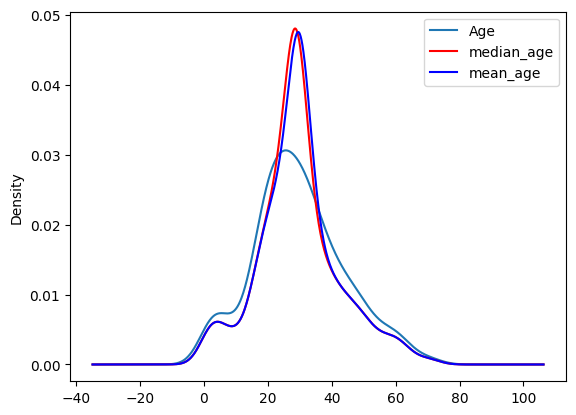

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train['Age'].plot(kind = 'kde',ax=ax)

# Variable imputed with median
x_train['median_age'].plot(kind = 'kde',ax=ax,color = 'red')

# Variable imputed with mean
x_train['mean_age'].plot(kind = 'kde',ax=ax,color = 'blue')

# Add label
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

plt.show()

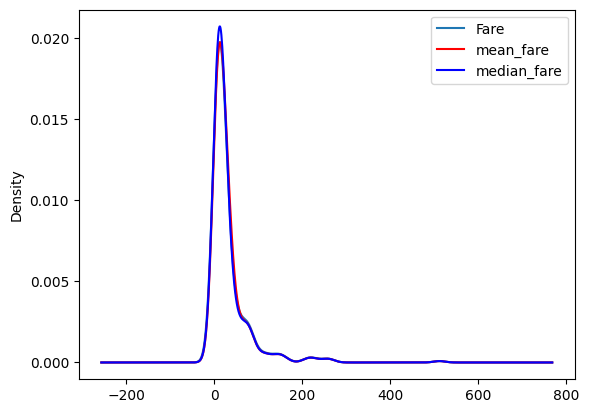

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

# Original variable distribution
x_train['Fare'].plot(kind = 'kde',ax=ax)

# Variable imputed with mean
x_train['mean_fare'].plot(kind = 'kde',ax=ax,color='red')

# Variable imputed with median
x_train['median_fare'].plot(kind = 'kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')
plt.show()

In [ ]:
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
median_age,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
mean_fare,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
median_fare,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [ ]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
mean_age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
median_age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
mean_fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
median_fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

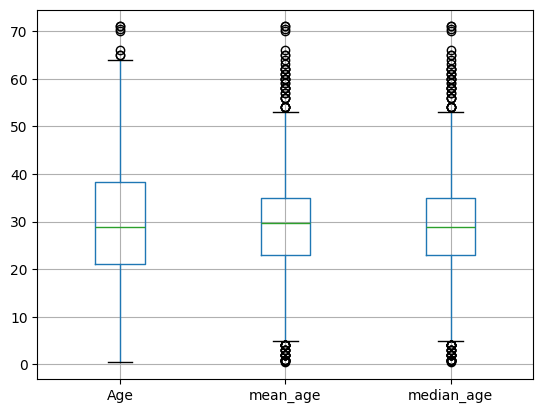

In [ ]:
x_train[['Age','mean_age','median_age']].boxplot()

<Axes: >

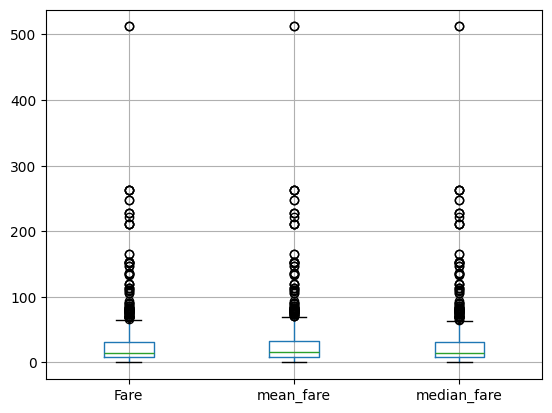

In [ ]:
x_train[['Fare','mean_fare','median_fare']].boxplot()

**Using Sklearn**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 2,random_state = 2)

In [ ]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.69405899, 221.7792    ,   0.        ],
       [ 29.69405899,  25.925     ,   0.        ]])